<a href="https://colab.research.google.com/github/hmzashh/programming-tests/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/Employee Attrition.csv')
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelors,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelors,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Masters & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelors,m,sourcing,1,29,5.0,2,1,0,76


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [9]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417,17417,16646,17417,17417,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelors,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5458,3918,11519,12314,9751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39083.491129,NaN,NaN,NaN,NaN,NaN,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,NaN,NaN,NaN,NaN,NaN,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000


In [10]:
for i in df.columns:
  print(df[i].value_counts())
  print('-----------------------------')

employee_id
49584    3
64573    2
73784    1
44636    1
15720    1
        ..
20327    1
34693    1
5990     1
52683    1
29732    1
Name: count, Length: 17414, dtype: int64
-----------------------------
department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    833
Finance               802
Legal                 332
R&D                   332
Name: count, dtype: int64
-----------------------------
region
region_2     3918
region_22    1990
region_7     1488
region_13     860
region_15     843
region_26     748
region_31     646
region_4      571
region_27     516
region_16     452
region_28     430
region_11     420
region_23     376
region_32     318
region_19     315
region_29     308
region_17     268
region_14     265
region_5      252
region_25     248
region_20     242
region_6      220
region_30     209
region_10     209
region_8      209
region_1      174
region_24     165
re

In [14]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,771
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1363
length_of_service,0


In [15]:
cat_data=df.select_dtypes(include='object')
cat_data

,department,region,education,gender,recruitment_channel
0,Technology,region_26,Bachelors,m,sourcing
1,HR,region_4,Bachelors,f,other
2,Sales & Marketing,region_13,Bachelors,m,other
3,Procurement,region_2,Bachelors,f,other
4,Finance,region_29,Bachelors,m,sourcing
...,...,...,...,...,...
17412,Technology,region_7,Bachelors,f,referred
17413,HR,region_7,Bachelors,m,other
17414,HR,region_7,Bachelors,m,other
17415,HR,region_7,Bachelors,m,other


# **EDA**

In [16]:
for i in cat_data:
  print(cat_data[i].value_counts())

department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    833
Finance               802
Legal                 332
R&D                   332
Name: count, dtype: int64
region
region_2     3918
region_22    1990
region_7     1488
region_13     860
region_15     843
region_26     748
region_31     646
region_4      571
region_27     516
region_16     452
region_28     430
region_11     420
region_23     376
region_32     318
region_19     315
region_29     308
region_17     268
region_14     265
region_5      252
region_25     248
region_20     242
region_6      220
region_30     209
region_10     209
region_8      209
region_1      174
region_24     165
region_12     156
region_9      134
region_21     129
region_34     123
region_3      110
region_33      91
region_18      14
Name: count, dtype: int64
education
Bachelors          11519
Masters & above     4841
Below Secondary      286

Univariate graphical EDA for cat data :


* The Sales and Marketing Department has the largest number of employees.

* Region 2 has the largest number of employees.

* The largest number of employees have a bachelor's degree.

* The largest number of employees are male.

* The largest number of employees whose recruitment method is unknown, followed by employees recruited through external recruitment channels.



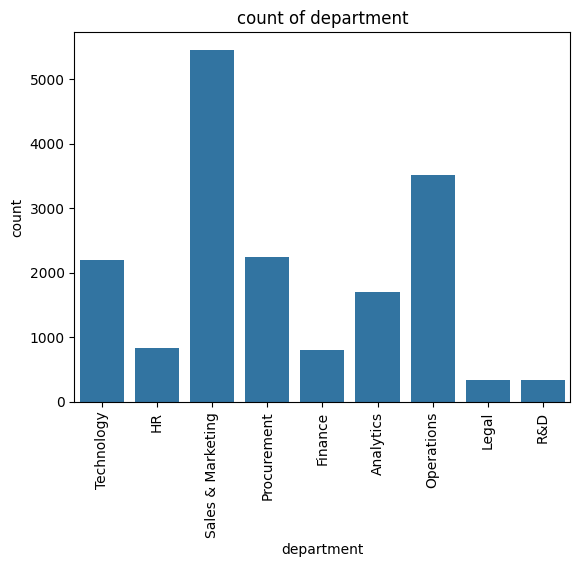

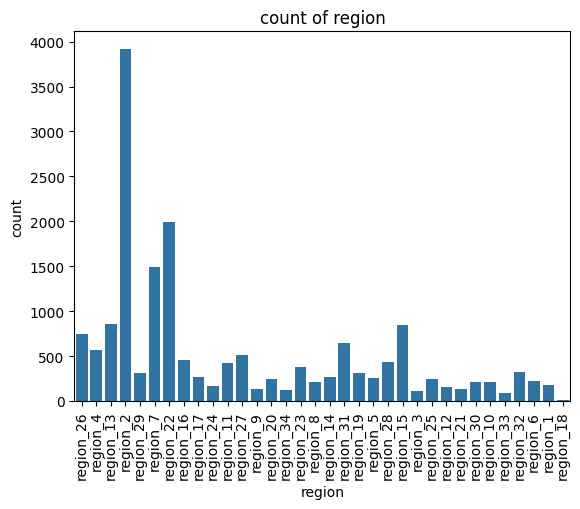

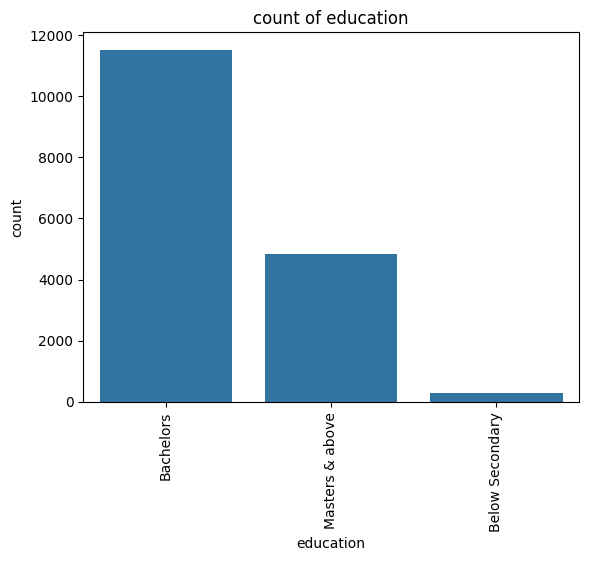

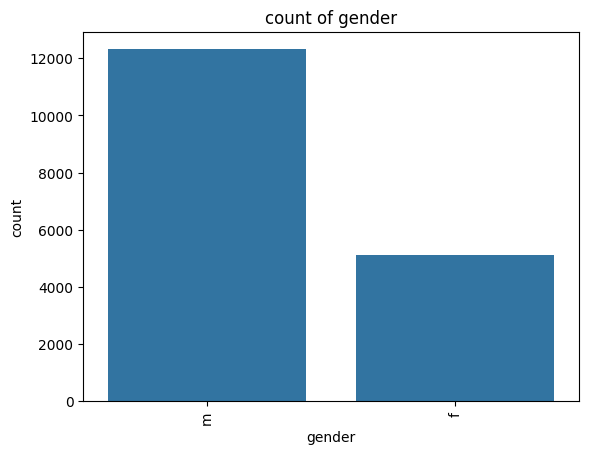

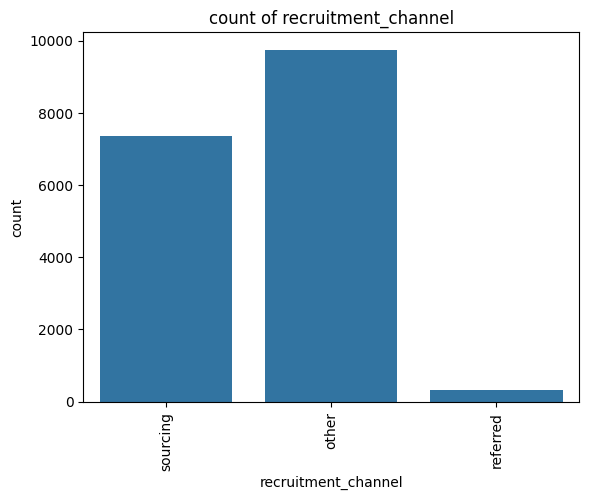

In [20]:
for col in cat_data:
  sns.countplot(cat_data,x=cat_data[col])
  plt.xlabel(f'{col}')
  plt.ylabel('count')
  plt.title(f'count of {col}')
  plt.xticks(rotation=90)
  plt.show()

In [26]:
num_data=df.select_dtypes(exclude='object')
num_data.columns


Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

the below figures show that :

*   The largest number of employees received at least one training course.

* The largest number of employees were between 25 and 35 years old.

* The largest number of employees received a rating of 3.

* The largest number of employees did not achieve the KPI and did not receive awards.



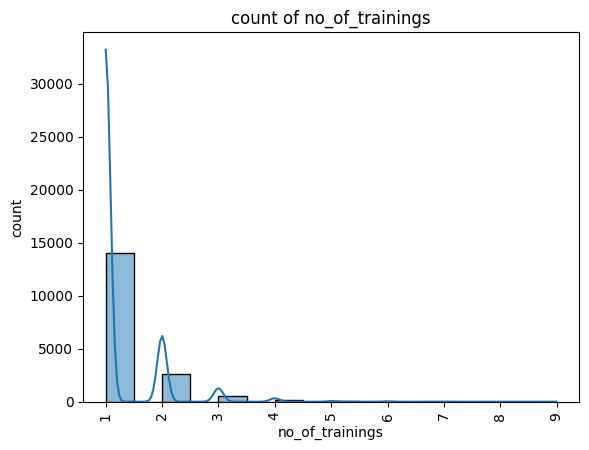

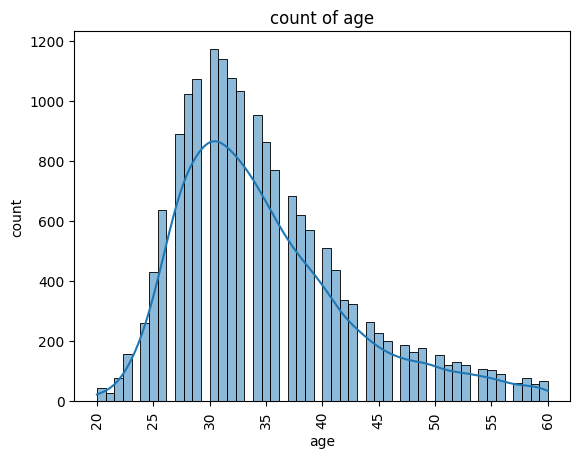

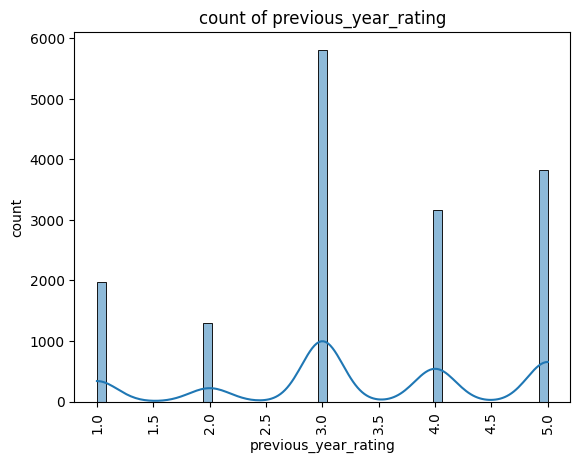

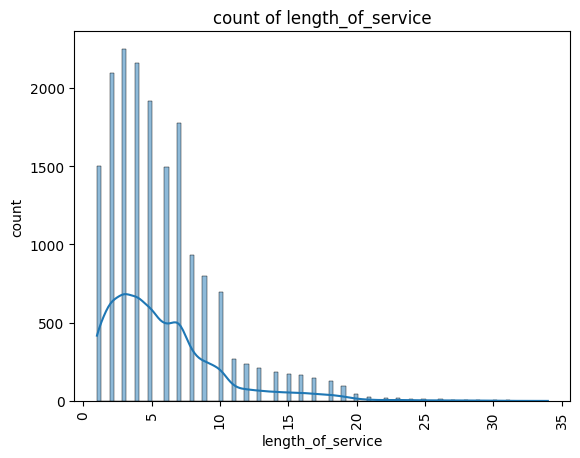

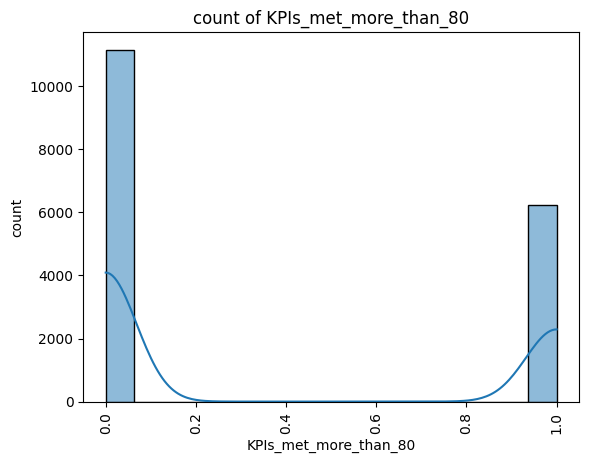

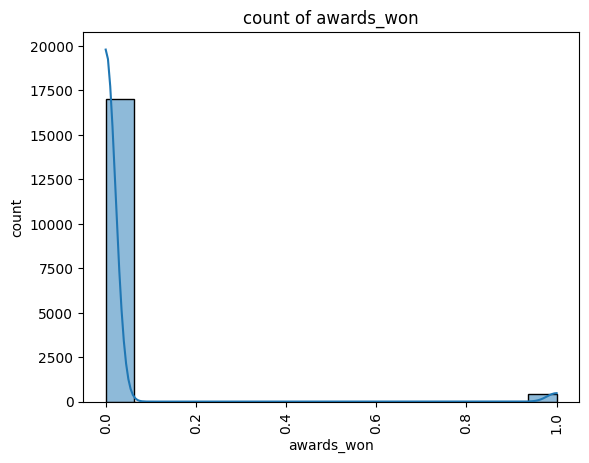

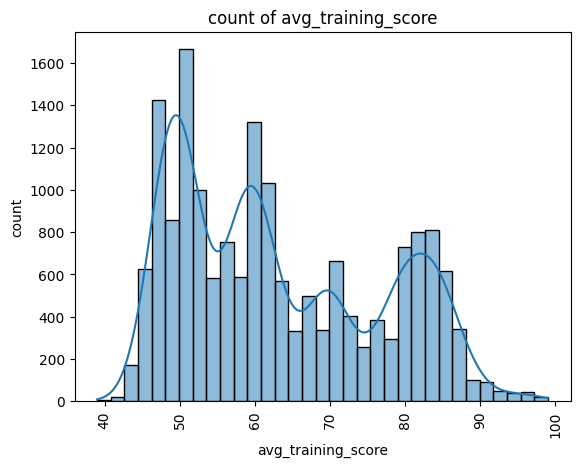

In [31]:
num1_data=['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score']
for col in num1_data:
  sns.histplot(df,x=num_data[col],kde=True)
  plt.xlabel(f'{col}')
  plt.ylabel('count')
  plt.title(f'count of {col}')
  plt.xticks(rotation=90)
  plt.show()

# **BIVARIATE ANALYSIS**

In [33]:
df.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77


* Note the following:
* Those with a rating of 5 have achieved the KPI.

* Increasing the number of years of service has no relation to achieving the KPI.

* The individuals who received awards are those who achieved the KPI.

* Individuals with an average training score of over 90 hours have achieved the KPI.

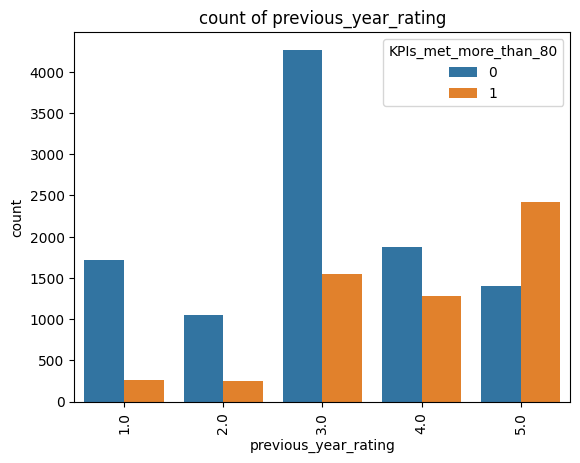

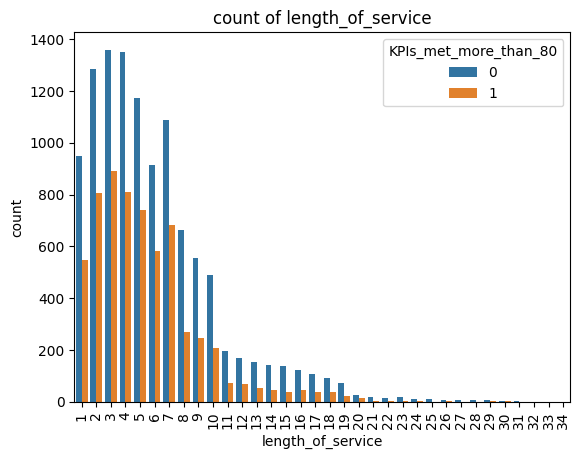

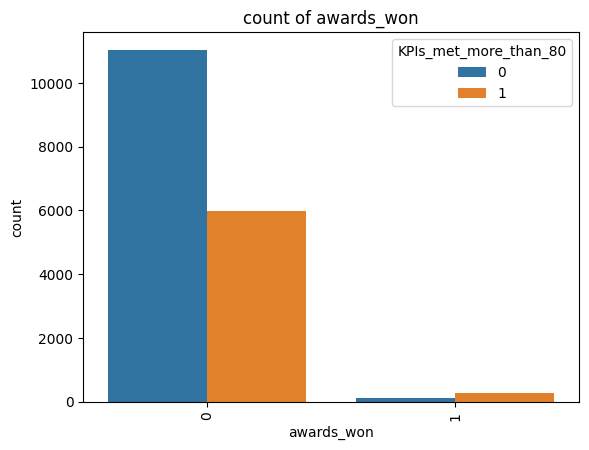

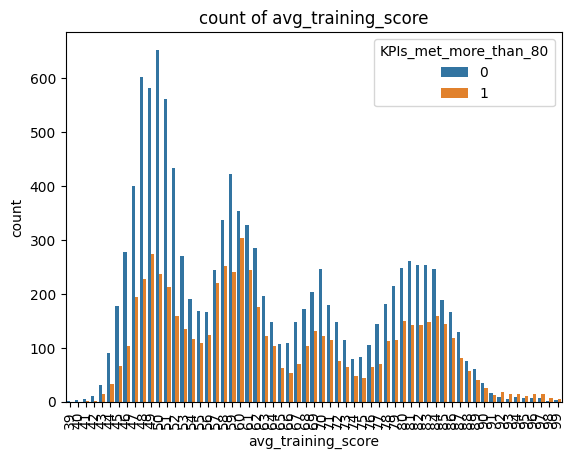

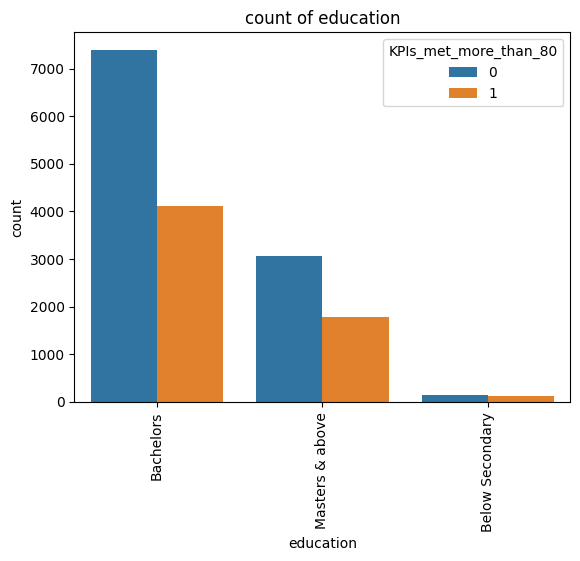

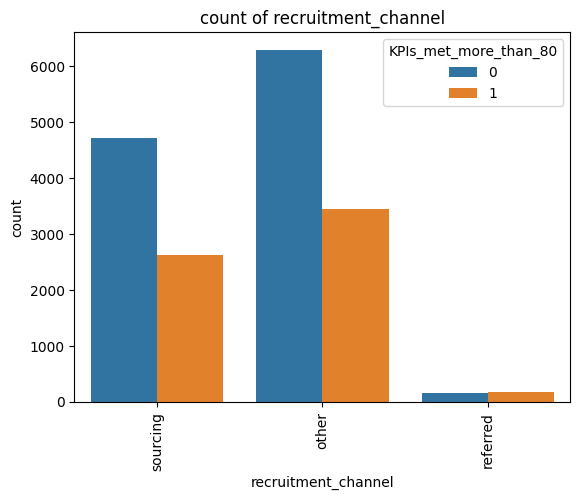

In [42]:
biv=['previous_year_rating','length_of_service','awards_won','avg_training_score','education','recruitment_channel']
for col in biv:
  sns.countplot(df,x=df[col],hue='KPIs_met_more_than_80')
  plt.xlabel(f'{col}')
  plt.ylabel('count')
  plt.title(f'count of {col}')
  plt.xticks(rotation=90)
  plt.show()